In [24]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

In [25]:
image = ski.io.imread(r'../images/binary_objects.jpg')

In [26]:
def line(length, degree):
    se = np.zeros((length, length))
    if degree == 0:
        se[int(length/2), :] = 1
    elif degree == 90:
        se[:, int(length/2)] = 1
    else:
        for i in range(length):
            se[i, int(i*np.tan(np.deg2rad(degree)))] = 1
    return se

In [27]:
se1 = ski.morphology.disk(5)
se2 = ski.morphology.disk(15)
se3 = ski.morphology.square(7)
se4 = ski.morphology.rectangle(5, 10)
se5 = line(10, 90)

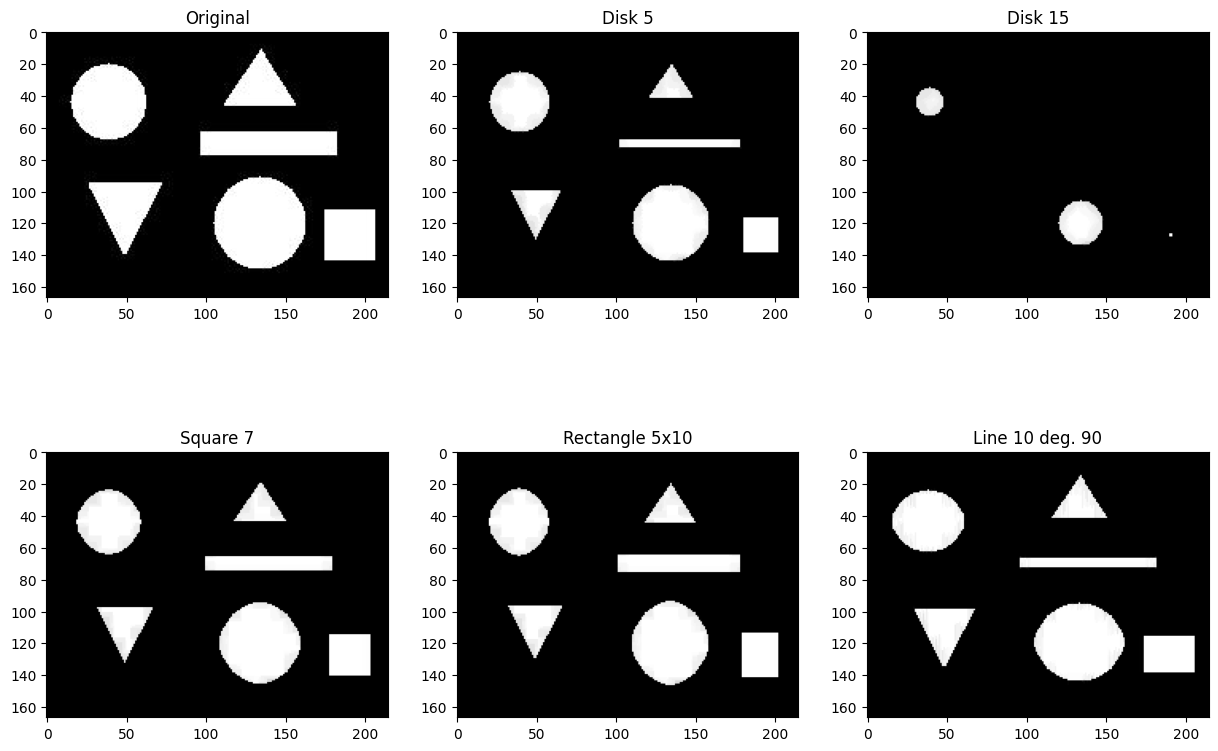

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
for i, (se, title) in enumerate(zip([se1, se2, se3, se4, se5], ['Disk 5', 'Disk 15', 'Square 7', 'Rectangle 5x10', 'Line 10 deg. 90'])):
    BW = ski.morphology.erosion(image, se)
    plt.subplot(2, 3, i+2), plt.imshow(BW, cmap='gray'), plt.title(title)
plt.show()
